In [76]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *
from venn import venn

HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol, allen_mouse_genes = LoadGeneINFO()
ExpMat, ExpZscoreMat, ExpMatNorm, ExpZscoreMatNorm = LoadExpressionMatrices()
ExpMat = pd.read_csv("dat/Jon_data/energy-exp_level.csv", index_col="ROW")
ExpMat2, ExpZscoreMat2, ExpMatNorm2, ExpZscoreMatNorm2 = LoadExpressionMatrices(
                        ExpMat = "../dat/allen-mouse-exp/new-energy-conn-model.csv", 
                        ExpZscoreMat = "../dat/allen-mouse-exp/new-energy-conn-zscore.csv",
                        ExpMatNorm = "../dat/allen-mouse-exp/energy-neuronorm.csv",
                        ExpZscoreMatNorm = "../dat/allen-mouse-exp/energy-zscore-neuronorm.csv")
gnomad_cons = pd.read_csv("../dat/genes/gnomad.v2.1.1.lof_metrics.by_gene.txt",
                          delimiter="\t", index_col="gene")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/jiayao/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (38,45) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


# 1. Control Data

## 1.1 Sibling Subsampled

In [18]:
# subsample 1000 times same number of gene as ASD
ssc_genes = pd.read_excel("../dat/genes/Supplementary_Table_7.xlsx")
sibling_genes = ssc_genes[(ssc_genes["dnv_LGDs_sib"]>0) | (ssc_genes["dnv_missense_sib"]>0)]
for i, row in sibling_genes.iterrows():
    entrez = int(GeneSymbol2Entrez.get(row["gene"], 0))
    sibling_genes.loc[i, "EntrezID"] = entrez

/Users/jiayao/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/jiayao/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [22]:
sibling_genes.columns.values

array(['gene', 'codingLen', 'codingLenInTarget', 'set_FMRPTargets',
       'set_PSD', 'set_Embryonic', 'set_ChromatinModifiers',
       'set_EssentialGenes', 'set_MendelianDiseaseGenes',
       'set_DeNovoLGDsInSchizoprenia', 'set_DeNovoLGDsInID',
       'dnv_LGDs_prb', 'dnv_LGDs_prbM', 'dnv_LGDs_prbML',
       'dnv_LGDs_prbMH', 'dnv_LGDs_prbF', 'dnv_LGDs_sib',
       'dnv_missense_prb', 'dnv_missense_prbM', 'dnv_missense_prbML',
       'dnv_missense_prbMH', 'dnv_missense_prbF', 'dnv_missense_sib',
       'dnv_synonymous_prb', 'dnv_synonymous_prbM',
       'dnv_synonymous_prbML', 'dnv_synonymous_prbMH',
       'dnv_synonymous_prbF', 'dnv_synonymous_sib', 'EntrezID'],
      dtype=object)

In [19]:
sibling_genes_entrez = [int(GeneSymbol2Entrez[x]) for x in sibling_genes["gene"].values if x in GeneSymbol2Entrez]
sib_dict = dict(zip(sibling_genes_entrez, sibling_genes_entrez))
sib_Match = MakeMatchDF(sib_dict, N=1000)

/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/23126.txt
23126 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/10847.txt
10847 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/339761.txt
339761 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/118427.txt
118427 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/219429.txt
219429 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/6339.txt
6339 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/293.txt
293 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/7179.txt
7179 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/23524.txt
23524 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/23499.txt
23499 Not Found in Dataset
/U

/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/340529.txt
340529 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/645974.txt
645974 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/5189.txt
5189 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/653583.txt
653583 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/50640.txt
50640 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/404785.txt
404785 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/5645.txt
5645 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/5646.txt
5646 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/5673.txt
5673 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/6019.txt
6019 Not Found in Dataset
/U

In [29]:
sib_Match.to_csv("dat/sibling_match.csv")

In [27]:
subsampled_sibling_data = []
for i in range(1000):
    tmp_df = sibling_genes.sample(n=157, replace=False)
    _, _sib = Sibling_Gene_Weights(tmp_df)
    subsampled_sibling_data.append(_sib)

In [28]:
filehandler = open("dat/sibling_subsamples.pk", 'wb') 
pickle.dump(subsampled_sibling_data, filehandler)

# 2. Long & Short Connection

In [83]:
meta_jon = pd.read_csv("dat/Jon_data/exp_bias-match-specific.csv")
meta_jon.columns = ["STR", "EFFECT", "Rank", "NGene"]
meta_jon = meta_jon.set_index("STR")
g = LoadConnectome2(ConnFil=
                    "../dat/allen-mouse-conn/norm_density-max_ipsi_contra-pval_0.05-deg_min_1-by_weight_pvalue.csv")
EdgeWeightsDict = EdgeDict(g, keyon="label")
adj_mat = pd.read_csv(
    "../dat/allen-mouse-conn/norm_density-max_ipsi_contra-pval_0.05-deg_min_1-by_weight_pvalue.csv",
    index_col="ROW")

In [10]:
sim1 = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_W_D_SA.csv")
candidates = sim1.columns.values
Init_States = np.ones(len(candidates))
ins = MostCohesiveCirtuis(Init_States, g, candidates, EdgeWeightsDict)
Cohes = []
for i, row in sim1.iterrows():
    ins.state = row.values
    InCirtuitNodes = ins.CandidateNodes[np.where(ins.state==1)[0]]
    Cohes.append(1-ins.energy())
best_id = np.argmax(Cohes)
state = sim1.loc[1, :].values
print(Cohes[best_id])

/Users/jiayao/Work/ASD_Circuits/src/ASD_Circuits.py:993: RuntimeWarning: divide by zero encountered in double_scalars
  return max(Frac_In, Frac_Out), Frac_In/Frac_Out


0.5355748265814344


In [11]:
InCirtuitNodes = ins.CandidateNodes[np.where(state==1)[0]]
print(len(InCirtuitNodes))

34


### 2.1 Exp correlation

In [13]:
Exp_Corr_DF = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-conn/Dist_ExpressionCorrelation.csv",
                         index_col = "ROW")
Exp_Corr_DF.head(2)

,Anterior_amygdalar_area,Anterior_cingulate_area_dorsal_part,Anterior_cingulate_area_ventral_part,Nucleus_accumbens,Anterodorsal_nucleus,Anterior_hypothalamic_nucleus,Agranular_insular_area_dorsal_part,Agranular_insular_area_posterior_part,Agranular_insular_area_ventral_part,Nucleus_ambiguus,...,Primary_visual_area,Posterolateral_visual_area,posteromedial_visual_area,Ventral_medial_nucleus_of_the_thalamus,Ventromedial_hypothalamic_nucleus,Ventral_posterolateral_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,Ventral_tegmental_area,Hypoglossal_nucleus
ROW,,,,,,,,,,,,,,,,,,,,,
Anterior_amygdalar_area,1.00000,0.85538,0.855530,0.914668,0.808901,0.879144,0.896017,0.861916,0.902554,0.835838,...,0.870985,0.849980,0.866197,0.863410,0.867540,0.887105,0.866147,0.845258,0.880674,0.822443
Anterior_cingulate_area_dorsal_part,0.85538,1.00000,0.967816,0.900520,0.824164,0.850890,0.903118,0.875560,0.908175,0.788785,...,0.916002,0.891939,0.904911,0.869791,0.818651,0.849138,0.842211,0.859613,0.862093,0.813509


In [26]:
list(InCirtuitNodes)

['Dentate_gyrus',
 'Prelimbic_area',
 'Orbital_area_lateral_part',
 'Field_CA1',
 'Infralimbic_area',
 'Dorsal_peduncular_area',
 'Nucleus_accumbens',
 'Field_CA2',
 'Lateral_posterior_nucleus_of_the_thalamus',
 'Orbital_area_ventrolateral_part',
 'Claustrum',
 'Field_CA3',
 'Anterior_olfactory_nucleus',
 'Endopiriform_nucleus_dorsal_part',
 'Subiculum_dorsal_part',
 'Anterior_cingulate_area_dorsal_part',
 'Primary_visual_area',
 'Anteromedial_visual_area',
 'Nucleus_of_reuniens',
 'Accessory_olfactory_bulb',
 'Retrosplenial_area_lateral_agranular_part',
 'Orbital_area_medial_part',
 'Secondary_motor_area',
 'Anterior_cingulate_area_ventral_part',
 'Presubiculum',
 'Agranular_insular_area_ventral_part',
 'Mediodorsal_nucleus_of_thalamus',
 'Lateral_septal_nucleus_caudal_caudodorsal_part',
 'Basolateral_amygdalar_nucleus',
 'Submedial_nucleus_of_the_thalamus',
 'Primary_somatosensory_area_trunk',
 'Posterior_parietal_association_areas',
 'Lateral_visual_area',
 'Taenia_tecta']

### 2.2 Within/Cross Regions

In [45]:
#adj_mat_cir = adj_mat.loc[InCirtuitNodes, InCirtuitNodes]
#str2reg = STR2Region()
#adj_mat_cir 
%time
ALL_STRs = adj_mat.index.values
adj_mat_local = []
adj_mat_distal = []
for str_i in ALL_STRs:
    tmp_local = []
    tmp_distal = []
    for str_j in ALL_STRs:
        weight = adj_mat.loc[str_i, str_j]
        if weight == 0:
            tmp_local.append(0)
            tmp_distal.append(0)
        else:
            rg_i = str2reg[str_i]
            rg_j = str2reg[str_j]
            if rg_i == rg_j:
                tmp_local.append(weight)
                tmp_distal.append(0)
            else:
                tmp_local.append(0)
                tmp_distal.append(weight)
    adj_mat_local.append(tmp_local)
    adj_mat_distal.append(tmp_distal)
adj_mat_local = pd.DataFrame(data=adj_mat_local, index=ALL_STRs, columns=ALL_STRs)
adj_mat_distal = pd.DataFrame(data=adj_mat_distal, index=ALL_STRs, columns=ALL_STRs)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.01 µs


In [50]:
###### local co
type("xxx") == str
g_local = LoadConnectome2(ConnFil=adj_mat_local)
g_distal = LoadConnectome2(ConnFil=adj_mat_distal)
EdgeWeightsDict_local = EdgeDict(g_local, keyon="label")
EdgeWeightsDict_distal = EdgeDict(g_distal, keyon="label")

In [122]:
meta_jon = pd.read_csv("dat/Jon_data/exp_bias-match-specific.csv")
meta_jon.columns = ["STR", "EFFECT", "Rank", "NGene"]
meta_jon = meta_jon.set_index("STR")
meta_jon.head(2)


,EFFECT,Rank,NGene
STR,,,
Dentate_gyrus,0.511273,1,95
Prelimbic_area,0.463267,2,95


In [124]:
Candidate = meta_jon.head(50).index.values
np.mean(ScoreSTRSet(g, Candidate, EdgeWeightsDict))

0.36263797442835155

In [126]:
CandidateNodes = meta_jon.head(50).index.values
Init_States = np.ones(len(CandidateNodes))
for idx in range(len(Init_States)):
    if np.random.rand() > 0.5:
        Init_States[idx] = 0
ins = MostCohesiveCirtuis(Init_States, g, CandidateNodes, EdgeWeightsDict, Direction=False, Weighted=False)

In [127]:
ins.copy_strategy = "deepcopy"
ins.Tmax=1
ins.Tmin=0.0001
Tmps, Energys, state, e = ins.anneal()
print("Done")


 Temperature        Energy    Accept   Improve      Steps        Elapsed   Remaining
     0.00010          0.62     0.00%     0.00%      20000.00     0:01:19     0:00:00

Done


In [128]:
print(1-e, state)
InCirtuitNodes = ins.CandidateNodes[np.where(ins.state==1)[0]]

0.37967599066691526 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [117]:
sim1 = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_W_D_SA.csv")
candidates = sim1.columns.values
Init_States = np.ones(len(candidates))
#del ins
ins = MostCohesiveCirtuis(Init_States, g_local, candidates, EdgeWeightsDict_local)
Cohes = []
for i, row in sim1.iterrows():
    ins.state = row.values
    InCirtuitNodes = ins.CandidateNodes[np.where(ins.state==1)[0]]
    Cohes.append(1-ins.energy())
best_id = np.argmax(Cohes)
state = sim1.loc[1, :].values
print(Cohes[best_id])

0.5062177065637561


In [68]:
sim1 = pd.read_csv("/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_W_D_SA.csv")
candidates = sim1.columns.values
Init_States = np.ones(len(candidates))
ins = MostCohesiveCirtuis(Init_States, g_distal, candidates, EdgeWeightsDict)
Cohes = []
for i, row in sim1.iterrows():
    ins.state = row.values
    InCirtuitNodes = ins.CandidateNodes[np.where(ins.state==1)[0]]
    Cohes.append(1-ins.energy())
best_id = np.argmax(Cohes)
state = sim1.loc[1, :].values
print(Cohes[best_id])

0.28887966996161585


In [129]:
local = ScoreSTRSet(g_local, InCirtuitNodes, EdgeWeightsDict)
distal = ScoreSTRSet(g_distal, InCirtuitNodes, EdgeWeightsDict)
total = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict)

In [130]:
print(np.mean(local), np.mean(distal), np.mean(total))

0.4978755850951142 0.28891859917511553 0.37967599066691526


In [121]:
InCirtuitNodes = sim1.columns.values
local = ScoreSTRSet(g_local, InCirtuitNodes, EdgeWeightsDict)
distal = ScoreSTRSet(g_distal, InCirtuitNodes, EdgeWeightsDict)
total = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict)
print(np.mean(local), np.mean(distal), np.mean(total))

0.4956158540290119 0.29083948169414986 0.36263797442835155


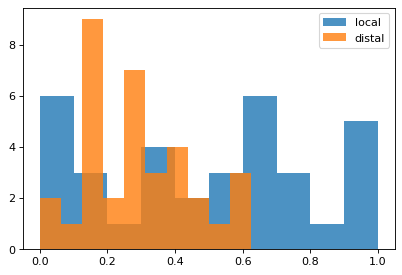

In [74]:
plt.hist(local, label="local", alpha=0.8)
plt.hist(distal, label="distal", alpha=0.8)
plt.legend()
plt.show()

In [75]:

#InCirtuitNodes = df.columns.values[]

In [78]:
df.loc[0,:].values

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.])

In [104]:
Complete, Local, Distal = [],[],[]
for i in range(1000):
    df = pd.read_csv("dat/cont.cir/ASD.MetaMatch.{}.csv".format(i), names=None)
    InCirtuitNodes = df.columns.values
    complete = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, False, False)
    local = ScoreSTRSet(g_local, InCirtuitNodes, EdgeWeightsDict, False, False)
    distal = ScoreSTRSet(g_distal, InCirtuitNodes, EdgeWeightsDict, False, False)
    Complete.append(np.mean(complete))
    Local.append(np.mean(local))
    Distal.append(np.mean(distal))
print(np.mean(Complete), np.mean(Local), np.mean(Distal))

0.3188506220012396 0.4150582970240224 0.26957693710191544


In [102]:
Complete, Local, Distal = [],[],[]
for i in range(1000):
    df = pd.read_csv("dat/cont.cir/ASD.MetaMatch.{}.csv".format(i), names=None)
    InCirtuitNodes = df.columns.values[np.where(df.loc[0,:].values==1)[0]]
    complete = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, False, False)
    local = ScoreSTRSet(g_local, InCirtuitNodes, EdgeWeightsDict, False, False)
    distal = ScoreSTRSet(g_distal, InCirtuitNodes, EdgeWeightsDict, False, False)
    Complete.append(np.mean(complete))
    Local.append(np.mean(local))
    Distal.append(np.mean(distal))

In [103]:
print(np.mean(Complete), np.mean(Local), np.mean(Distal))

0.36415218426412843 0.47525381440123765 0.2921850958076417


In [99]:
complete = ScoreSTRSet(g, InCirtuitNodes, EdgeWeightsDict, True, True)
local = ScoreSTRSet(g_local, InCirtuitNodes, EdgeWeightsDict, True, True)
distal = ScoreSTRSet(g_distal, InCirtuitNodes, EdgeWeightsDict, True, True)
print(complete, local, distal)

ZeroDivisionError: division by zero

In [39]:
def ITR(Internal_In, Total_In, Internal_Out, Total_Out):
    return (Internal_In/Total_In) / (Internal_Out/Total_Out)

In [40]:
ITR(4,6,1,9) # Brodcastor

6.0

In [41]:
ITR(1,6,8,9) # Intergrator

0.1875

### 2.3 Cartesian Ipsilateral distance

# 3. ASDp vs NDD

In [77]:
ASD_P_NDD_Split = pd.read_excel("../dat/genes/asd/ASC_ASDpNDD_Split.xlsx")
Spark_Meta = pd.read_excel("/Users/jiayao/Work/ASD_Circuits/dat/genes/asd/spark_Meta_top_genes.xlsx")

In [78]:
ASD_P = ASD_P_NDD_Split[ASD_P_NDD_Split["classifier"]=="ASD_P"]["gene"].values
NDD = ASD_P_NDD_Split[ASD_P_NDD_Split["classifier"]=="ASD_NDD"]["gene"].values 
Spark_Meta_ASDp = Spark_Meta[Spark_Meta["HGNC"].isin(ASD_P)]
Spark_Meta_NDD = Spark_Meta[Spark_Meta["HGNC"].isin(NDD)]

In [79]:
Agg_gene2None, Agg_gene2MutN = Aggregate_Gene_Weights2(Spark_Meta, out = "dat/bias2/meta.gene.weights.csv")
_, ASDp_gene2MutN = Aggregate_Gene_Weights2(Spark_Meta_ASDp, out = None)
_, NDD_gene2MutN = Aggregate_Gene_Weights2(Spark_Meta_NDD, out = None)
Agg_Match = MakeMatchDF(Agg_gene2MutN, N=1000)

/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/23126.txt
23126 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/27086.txt
27086 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/287.txt
287 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/7314.txt
7314 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/23096.txt
23096 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/23392.txt
23392 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/90167.txt
90167 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/293.txt
293 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/58491.txt
58491 Not Found in Dataset
/Users/jiayao/Work/ASD_Circuits/src/dat/Jon_data/match-exp_avg/10847.txt
10847 Not Found in Dataset
/Users/jia

In [80]:
print(len(ASDp_gene2MutN), len(NDD_gene2MutN))

24 34


In [84]:
SA_wd = "/Users/jiayao/Work/ASD_Circuits/src/dat/circuits/ASD_Pad1_SA.csv"
weighted = True; directed = True
Incircuit_wd = GetBestCoheSAFil(SA_wd, weighted, directed, g=g, EdgeWeightsDict=EdgeWeightsDict)

In [87]:
str2reg = STR2Region()
str2reg["Dentate_gyrus"]

'Hippocampal_region'

In [88]:
Incircuit_wd
Incircuit_regions = [str2reg[x] for x in Incircuit_wd]
Incircuit_df = pd.DataFrame(data={"STR":Incircuit_wd, "REG":Incircuit_regions})
Incircuit_df.head(2)

,STR,REG
0,Dentate_gyrus,Hippocampal_region
1,Prelimbic_area,Isocortex


In [89]:
#def oneSTRGeneSet():
   

In [90]:
STR = "Dentate_gyrus"
asd_p = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, ASDp_gene2MutN, Method = 2, Match_DF = Agg_Match)

In [91]:
G1_Region = ["Isocortex"]
G2_Region = ["Thalamus", "Striatum"]

# ASDp
G1, G2 = [], []
for region in G1_Region:
    STRs = Incircuit_df[Incircuit_df["REG"]==region]["STR"].values
    for STR in STRs:
        z_dist = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, ASDp_gene2MutN, Method = 2, Match_DF = Agg_Match)
        G1.append(z_dist)
G1 = np.array(G1)        
for region in G2_Region:
    STRs = Incircuit_df[Incircuit_df["REG"]==region]["STR"].values
    for STR in STRs:
        z_dist = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, ASDp_gene2MutN, Method = 2, Match_DF = Agg_Match)
        G2.append(z_dist)
G1 = np.array(G1)  
G2 = np.array(G2)  
xx_1 = np.mean(G1, axis=0)
xx_2 = np.mean(G2, axis=0)

1.0939422143746094 1.429810191677173 0.765096109079633
wilcoxon 126.0 0.7313888072967529
mannwu 263.0 0.4912362699802683


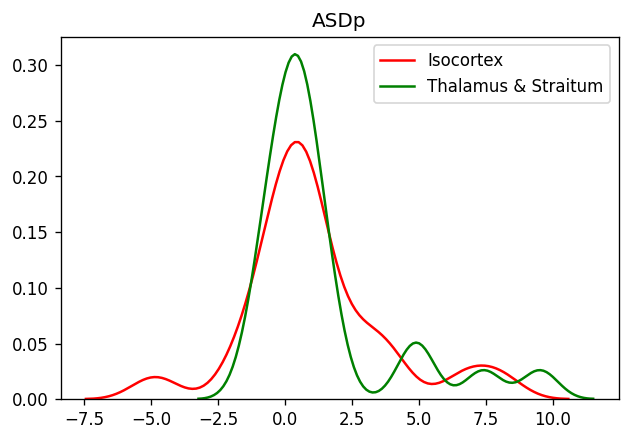

In [92]:
fig = plt.figure(dpi=120)
colors = ["red", "green", "blue"]
sns.distplot(a=xx_1, hist=False, label="Isocortex", color=colors[0])
sns.distplot(a=xx_2, hist=False, label="Thalamus & Straitum", color=colors[1])
plt.title("ASDp")
from scipy.stats import wilcoxon
print(np.mean(xx_1), np.mean(xx_2), np.mean(xx_1)/np.mean(xx_2))
w, p = wilcoxon(xx_1, xx_2)
print("wilcoxon", w, p)
w, p = mannwhitneyu(xx_1, xx_2)
print("mannwu", w, p)

In [93]:
G1_Region = ["Isocortex"]
G2_Region = ["Thalamus", "Striatum"]

# ASDp
G1, G2 = [], []
for region in G1_Region:
    STRs = Incircuit_df[Incircuit_df["REG"]==region]["STR"].values
    for STR in STRs:
        z_dist = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, NDD_gene2MutN, Method = 2, Match_DF = Agg_Match)
        G1.append(z_dist)
G1 = np.array(G1)        
for region in G2_Region:
    STRs = Incircuit_df[Incircuit_df["REG"]==region]["STR"].values
    for STR in STRs:
        z_dist = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, NDD_gene2MutN, Method = 2, Match_DF = Agg_Match)
        G2.append(z_dist)
G1 = np.array(G1)  
G2 = np.array(G2)  
xx_1 = np.mean(G1, axis=0)
xx_2 = np.mean(G2, axis=0)

Text(0.5, 1.0, 'NDD')

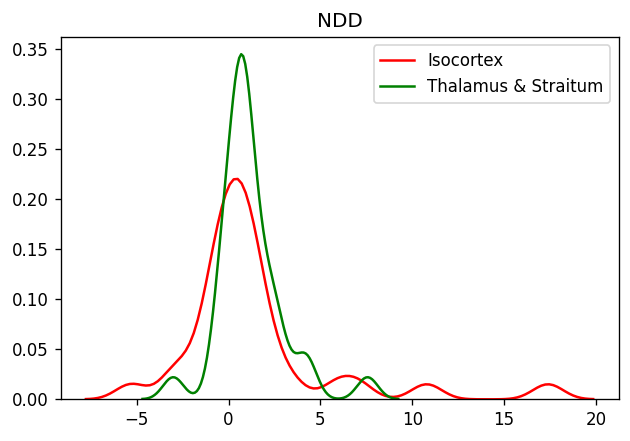

In [94]:
fig = plt.figure(dpi=120)
colors = ["red", "green", "blue"]
sns.distplot(a=xx_1, hist=False, label="Isocortex", color=colors[0])
sns.distplot(a=xx_2, hist=False, label="Thalamus & Straitum", color=colors[1])
mannwhitneyu(xx_1, xx_2)
plt.title("NDD")

In [95]:
from scipy.stats import wilcoxon
print(np.mean(xx_1), np.mean(xx_2), np.mean(xx_1)/np.mean(xx_2))
w, p = wilcoxon(xx_1, xx_2)
print("wilcoxon", w, p)
w, p = mannwhitneyu(xx_1, xx_2)
print("mannwu", w, p)

1.3544220870836106 1.1973652899847167 1.1311686570611201
wilcoxon 247.0 0.7505744646291802
mannwu 428.0 0.13110831742682938


In [202]:
REGs = list(set(Incircuit_df["REG"].values))
REGs

['Striatum',
 'Thalamus',
 'Isocortex',
 'Hippocampal_formation',
 'Cortical_subplate',
 'Olfactory_areas',
 'Hippocampal_region']

In [205]:
for REG in list(set(Incircuit_df["REG"].values)):
    print(REG)
    STRs = Incircuit_df[Incircuit_df["REG"]==REG]["STR"].values
    tmp_dat_asdp = []
    tmp_dat_ndd = []
    for STR in STRs:
        asd_p = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, ASDp_gene2MutN, Method = 2, Match_DF = Agg_Match)
        asd_ndd = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, NDD_gene2MutN, Method = 2, Match_DF = Agg_Match)
        tmp_dat_asdp.append(asd_p)
        tmp_dat_ndd.append(asd_ndd)
    tmp_dat_asdp = np.array(tmp_dat_asdp)
    tmp_dat_ndd = np.array(tmp_dat_ndd)
    xx_1 = np.mean(tmp_dat_asdp, axis=0)
    xx_2 = np.mean(tmp_dat_ndd, axis=0)
    print(np.mean(xx_1), np.mean(xx_2), np.mean(xx_1)/np.mean(xx_2))
    print(mannwhitneyu(xx_1, xx_2))
    print(mannwhitneyu(tmp_dat_asdp.flatten(), tmp_dat_ndd.flatten()))

Striatum
1.2073628808832506 1.128681788475073 1.0697106068438307
MannwhitneyuResult(statistic=356.0, pvalue=0.42221681756962065)
MannwhitneyuResult(statistic=3147.0, pvalue=0.2934174432205695)
Thalamus
1.5966456747726148 1.2488779161169496 1.278464175054801
MannwhitneyuResult(statistic=352.0, pvalue=0.3957058430106323)
MannwhitneyuResult(statistic=5864.0, pvalue=0.47987716193181584)
Isocortex
1.0939422143746094 1.3544220870836106 0.8076819071447102
MannwhitneyuResult(statistic=340.0, pvalue=0.3194508361420093)
MannwhitneyuResult(statistic=69568.0, pvalue=0.20025227333305184)
Hippocampal_formation
1.1096809018787732 1.277120501254313 0.8688928732949707
MannwhitneyuResult(statistic=364.0, pvalue=0.4761889955322788)
MannwhitneyuResult(statistic=5720.0, pvalue=0.3595450493775452)
Cortical_subplate
1.3048360580262055 1.6162828972914167 0.8073067284278408
MannwhitneyuResult(statistic=356.0, pvalue=0.42221681756962065)
MannwhitneyuResult(statistic=3206.0, pvalue=0.3637244952752816)
Olfactory_

In [210]:
REG="Thalamus"
STRs = Incircuit_df[Incircuit_df["REG"]==REG]["STR"].values
tmp_dat_asdp = []
tmp_dat_ndd = []
for STR in STRs:
    asd_p = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, ASDp_gene2MutN, Method = 2, Match_DF = Agg_Match)
    asd_ndd = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, NDD_gene2MutN, Method = 2, Match_DF = Agg_Match)
    tmp_dat_asdp.append(asd_p)
    tmp_dat_ndd.append(asd_ndd)
tmp_dat_asdp = np.array(tmp_dat_asdp)
tmp_dat_ndd = np.array(tmp_dat_ndd)
xx_1 = np.mean(tmp_dat_asdp, axis=0)
xx_2 = np.mean(tmp_dat_ndd, axis=0)
print(np.mean(xx_1), np.mean(xx_2), np.mean(xx_1)/np.mean(xx_2))
print(mannwhitneyu(xx_1, xx_2))
print(mannwhitneyu(tmp_dat_asdp.flatten(), tmp_dat_ndd.flatten()))

1.5966456747726148 1.2488779161169496 1.278464175054801
MannwhitneyuResult(statistic=352.0, pvalue=0.3957058430106323)
MannwhitneyuResult(statistic=5864.0, pvalue=0.47987716193181584)


Text(0.5, 1.0, 'Thalamus')

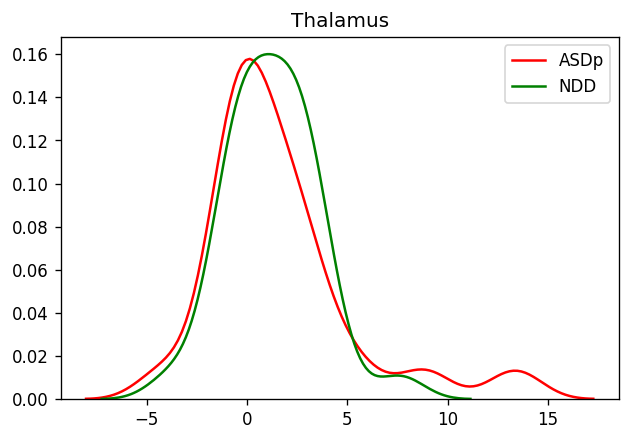

In [211]:
fig = plt.figure(dpi=120)
colors = ["red", "green", "blue"]
sns.distplot(a=xx_1, hist=False, label="ASDp", color=colors[0])
sns.distplot(a=xx_2, hist=False, label="NDD", color=colors[1])
mannwhitneyu(xx_1, xx_2)
plt.title(REG)

In [208]:
REG="Isocortex"
STRs = Incircuit_df[Incircuit_df["REG"]==REG]["STR"].values
tmp_dat_asdp = []
tmp_dat_ndd = []
for STR in STRs:
    asd_p = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, ASDp_gene2MutN, Method = 2, Match_DF = Agg_Match)
    asd_ndd = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, NDD_gene2MutN, Method = 2, Match_DF = Agg_Match)
    tmp_dat_asdp.append(asd_p)
    tmp_dat_ndd.append(asd_ndd)
tmp_dat_asdp = np.array(tmp_dat_asdp)
tmp_dat_ndd = np.array(tmp_dat_ndd)
xx_1 = np.sum(tmp_dat_asdp, axis=0)
xx_2 = np.sum(tmp_dat_ndd, axis=0)
print(np.mean(xx_1), np.mean(xx_2), np.mean(xx_1)/np.mean(xx_2))
print(mannwhitneyu(xx_1, xx_2))
print(mannwhitneyu(tmp_dat_asdp.flatten(), tmp_dat_ndd.flatten()))

15.315191001244534 18.96190921917055 0.8076819071447102
MannwhitneyuResult(statistic=340.0, pvalue=0.3194508361420093)
MannwhitneyuResult(statistic=69568.0, pvalue=0.20025227333305184)


Text(0.5, 1.0, 'Isocortex')

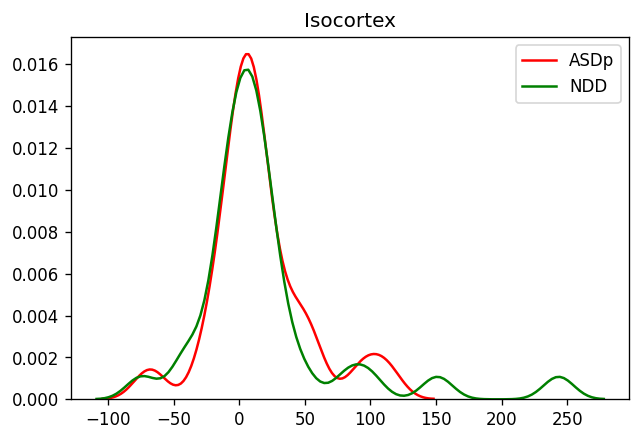

In [209]:
fig = plt.figure(dpi=120)
colors = ["red", "green", "blue"]
sns.distplot(a=xx_1, hist=False, label="ASDp", color=colors[0])
sns.distplot(a=xx_2, hist=False, label="NDD", color=colors[1])
mannwhitneyu(xx_1, xx_2)
plt.title(REG)

In [197]:
np.mean(xx_1)

15.315191001244534

In [ ]:
    tmp_dat_asdp = np.array(tmp_dat_asdp)
    tmp_dat_ndd = np.array(tmp_dat_ndd)
    xx_1 = np.sum(tmp_dat_asdp, axis=0)
    xx_2 = np.sum(tmp_dat_ndd, axis=0)
    print(np.mean(xx_1), np.mean(xx_2), np.mean(xx_1)/np.mean(xx_2))
    print(mannwhitneyu(xx_1, xx_2))
    print(mannwhitneyu(tmp_dat_asdp.flatten(), tmp_dat_ndd.flatten()))

In [194]:
for REG in list(set(Incircuit_df["REG"].values)):
    #print(REG)
    STRs = Incircuit_df[Incircuit_df["REG"]==REG]["STR"].values

    for STR in STRs:
        #print(REG, STR)
        asd_p = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, ASDp_gene2MutN, Method = 2, Match_DF = Agg_Match)
        asd_ndd = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, NDD_gene2MutN, Method = 2, Match_DF = Agg_Match)
        bias_1, bias_2 = np.mean(asd_p), np.mean(asd_ndd)
        ratio = bias_1/bias_2
        if ratio > 2 or ratio < 0.5:
            print(REG, STR)
            print(bias_1, bias_2, ratio)
            print(mannwhitneyu(asd_p, asd_ndd))
            print()
        #print(np.mean(asd_p), np.mean(asd_ndd), np.mean(asd_p)/np.mean(asd_ndd))


Thalamus Lateral_posterior_nucleus_of_the_thalamus
2.7143339861684534 0.779528647445773 3.482019544839464
MannwhitneyuResult(statistic=317.0, pvalue=0.19443014205879294)

Thalamus Nucleus_of_reuniens
0.6500364280016345 1.5763445148576292 0.4123695181318558
MannwhitneyuResult(statistic=329.0, pvalue=0.2556132862487377)

Isocortex Infralimbic_area
0.8895732974263292 1.9696716719161798 0.4516353208049719
MannwhitneyuResult(statistic=324.0, pvalue=0.22896962063127257)

Isocortex Retrosplenial_area_lateral_agranular_part
0.6458270265995456 1.4665296804438648 0.440377740192805
MannwhitneyuResult(statistic=343.0, pvalue=0.337956843104302)

Cortical_subplate Basolateral_amygdalar_nucleus
0.6914534249568876 1.6408511080405321 0.42139924918757915
MannwhitneyuResult(statistic=325.0, pvalue=0.23417038834373272)

Olfactory_areas Accessory_olfactory_bulb
1.8434805922153685 0.5769028017032269 3.195478660829421
MannwhitneyuResult(statistic=332.0, pvalue=0.2723438005316339)

Olfactory_areas Taenia_tect

In [34]:
ssc_mutations = pd.read_excel("/Users/jiayao/Work/BrainDisorders/data/nature13908-s2/Supplementary_Table_2.xlsx")

In [35]:
set(ssc_mutations["effectType"].values)

{"3'UTR",
 "3'UTR-intron",
 "5'UTR",
 "5'UTR-intron",
 'frame-shift',
 'intergenic',
 'intron',
 'missense',
 'no-frame-shift',
 'no-frame-shift-newStop',
 'noEnd',
 'noStart',
 'non-coding',
 'non-coding-intron',
 'nonsense',
 'splice-site',
 'synonymous'}

In [36]:
ssc_proband_mut_dat = []
for i, row in ssc_mutations.iterrows():
    if "pM" in row["inChild"] or "pF" in row["inChild"]:
        if row["effectType"] in ["missense", "noStart", "nonsense", "splice-site", "frame-shift"]:
            ssc_proband_mut_dat.append(row)
ssc_proband_mut = pd.DataFrame(data=ssc_proband_mut_dat, columns=ssc_mutations.columns.values)

In [31]:
mutations.head(4)

,familyId,location,variant,vcfVariant,inChild,fromParent,effectGene,effectType,familyDescription,CSHL,YALE,UW,IossifovWE2012,EichlerWE2012,StateWE2012,EichlerTG2012
0,14505,1:897349,sub(G->A),1:897349:G:A,pM,NaN,KLHL17,synonymous,pMsM,NaN,NaN,weak:valid,NaN,NaN,NaN,NaN
1,14320,3:127395222,sub(T->G),3:127395222:T:G,pF,NaN,ABTB1,noStart,pFsM,strong,NaN,NaN,NaN,NaN,NaN,NaN
2,12111,1:1225729,sub(G->A),1:1225729:G:A,sF,NaN,SCNN1D,missense,pMsF,NaN,NaN,strong:valid,NaN,NaN,NaN,NaN
3,11138,1:1230203,sub(G->A),1:1230203:G:A,sM,NaN,ACAP3,intron,pMsM,strong,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
ssc_fam_info = pd.read_excel("/Users/jiayao/Work/BrainDisorders/data/nature13908-s2/Supplementary_Table_1.xlsx",
                            index_col="familyId")

In [40]:
ssc_fam_info.head(2)

,collection,probandGender,siblingGender,SequencedAtCSHL,SequencedAtUW,SequencedAtYALE,motherRace,fatherRace,probandVIQ,probandNVIQ,...,fatherAgeInMonthsAtBirthOfProband,motherAgeInMonthsAtBirthOfSibling,fatherAgeInMonthsAtBirthOfSibling,prbRecLGDs,prbLGDs,prbMissense,prbSynonymous,sibLGDs,sibMissense,sibSynonymous
familyId,,,,,,,,,,,,,,,,,,,,,
11542,ssc,F,F,NaN,"p1,s1",NaN,more-than-one-race,white,121.0,102.0,...,430.0,403.0,404.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
13736,ssc,M,M,"p1,s1",NaN,NaN,white,white,119.0,112.0,...,400.0,425.0,429.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
for i, row in ssc_proband_mut.iterrows():
    VIQ = ssc_fam_info.loc[row["familyId"], "probandVIQ"]
    NVIQ = ssc_fam_info.loc[row["familyId"], "probandNVIQ"]
    ssc_proband_mut.loc[i, "VIQ"] = VIQ
    ssc_proband_mut.loc[i, "NVIQ"] = NVIQ

In [48]:
Spark_Meta = pd.read_excel("/Users/jiayao/Work/ASD_Circuits/dat/genes/asd/spark_Meta_top_genes.xlsx")
Spark_Meta.shape

(159, 67)

In [49]:
Spark_Meta

,GeneID,EntrezID,HGNC,CytoBand,ExACpLI,LoFOvsE,LOEUF,LOEUFbin,SynOvsE,sHet,...,AllExpected_NDD,pAllEnrich_NDD,MisObserved_NDD,MisExpected_NDD,pMisEnrich_NDD,MisEvents_NDD,MisDist_NDD,pMisCluster_NDD,pMisComb_NDD,pDenovoWEST_NDD
0,ENSG00000143442,23126,POGZ,1q21.3,1,0.045859,0.119,0,0.97057,0.214955,...,0.934605,1e-14,2.44,0.601588,0.00168,9,550.2,0.03,0.000571,1e-14
1,ENSG00000169057,4204,MECP2,Xq28,0.69809,0.085755,0.407,1,2.02820,0.0882034,...,0.18052,1e-14,9.24,0.124697,1e-14,44,131.4,1.01e-08,5.22e-21,5.22e-21
2,ENSG00000136531,6326,SCN2A,2q24.3,1,0.060487,0.127,0,1.00840,0.257771,...,1.88419,1e-14,34.18,1.47464,1e-14,58,1106.6,0.00247,9.7e-16,9.7e-16
3,ENSG00000171862,5728,PTEN,10q23.31,0.97551,0.240930,0.507,2,1.01830,0.12616,...,0.365588,1e-14,14.1,0.273796,1e-14,20,178.5,0.00542,2.09e-15,2.09e-15
4,ENSG00000173575,1106,CHD2,15q26.1,1,0.027031,0.070,0,0.95212,0.172054,...,1.61531,1e-14,8.78,1.11824,1.38e-09,13,410.8,2.4e-05,1.06e-12,1e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,ENSG00000147050,7403,KDM6A,Xp11.3,0.99999,0.070167,0.161,0,0.99117,0.175065,...,0.541389,5.41e-17,2.99,0.340524,2.93e-05,9,513.7,0.01,6.04e-06,5.41e-17
155,ENSG00000117305,3155,HMGCL,1p36.11,0.0025625,0.671950,1.112,6,1.02010,0.0114368,...,0.0576467,0.15,0.16,0.044162,0.08,2,68,0.14,0.06,0.06
156,ENSG00000095951,3096,HIVEP1,6p24.1,0.99999,0.095681,0.173,0,1.01900,0.140793,...,1.36579,0.37,1.47,0.916254,0.15,7,1676,0.31,0.19,0.19
157,ENSG00000177150,125228,FAM210A,18p11.21,0.015124,0.857950,1.450,7,1.01740,0.0202452,...,.,.,.,.,.,.,.,.,.,.


In [50]:
ssc_proband_mut_candidate = ssc_proband_mut[ssc_proband_mut["effectGene"].isin(Spark_Meta["HGNC"].values)]

In [51]:
ssc_proband_mut_candidate

,familyId,location,variant,vcfVariant,inChild,fromParent,effectGene,effectType,familyDescription,CSHL,YALE,UW,IossifovWE2012,EichlerWE2012,StateWE2012,EichlerTG2012,VIQ,NVIQ
108,13545,20:49509095,ins(T),20:49509094:G:GT,pM,NaN,ADNP,frame-shift,pM,NaN,strong:valid,NaN,NaN,NaN,NaN,yes,23.0,38.0
123,12130,20:49510028,del(2),20:49510027:CTT:C,pF,NaN,ADNP,frame-shift,pF,NaN,NaN,strong:valid,NaN,yes,NaN,NaN,62.0,55.0
242,12645,4:114232545,sub(C->T),4:114232545:C:T,pM,NaN,ANK2,nonsense,pMsM,strong:valid,NaN,NaN,yes,NaN,NaN,NaN,94.0,84.0
259,14256,4:114251469,sub(C->T),4:114251469:C:T,pM,NaN,ANK2,nonsense,pMsF,NaN,strong:valid,NaN,NaN,NaN,NaN,NaN,105.0,98.0
264,13768,4:114277600,del(1),4:114277599:AG:A,pM,NaN,ANK2,frame-shift,pMsF,strong,NaN,NaN,NaN,NaN,NaN,NaN,100.0,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5326,14204,10:28899669,del(4),10:28899668:AATTC:A,pF,NaN,WAC,frame-shift,pFsF,strong:valid,NaN,NaN,NaN,NaN,NaN,NaN,68.0,57.0
5328,12044,4:85715777,sub(G->A),4:85715777:G:A,pM,NaN,WDFY3,nonsense,pMsM,NaN,strong:valid,NaN,NaN,NaN,NaN,NaN,76.0,75.0
5341,13094,4:85719152,sub(T->A),4:85719152:T:A,pM,NaN,WDFY3,nonsense,pMsM,strong:valid,NaN,NaN,yes,NaN,NaN,NaN,55.0,80.0
5451,12693,22:41572350,sub(C->T),22:41572350:C:T,pM,NaN,EP300,missense,pMsF,strong,NaN,NaN,NaN,NaN,NaN,NaN,97.0,93.0


In [56]:
ssc_proband_mut_candidate.to_csv("dat/ssc_mut_IQ_meta_candidate.csv")

In [53]:
HighIQMuts = ssc_proband_mut_candidate[ssc_proband_mut_candidate["NVIQ"]>70]
LowIQMuts = ssc_proband_mut_candidate[ssc_proband_mut_candidate["NVIQ"]<=70]

In [65]:
HighIQGenes = set(HighIQMuts["effectGene"].values)
len(set(HighIQMuts["effectGene"].values))


58

In [66]:
LowIQGenes = set(LowIQMuts["effectGene"].values)
len(set(LowIQMuts["effectGene"].values))

54

In [70]:
Common_genes = HighIQGenes.intersection(LowIQGenes)
print(len(Common_genes))
HighIQOnly_genes = list(HighIQGenes.difference(LowIQGenes))
print(len(HighIQOnly_genes))
LowIQOnly_genes = list(LowIQGenes.difference(HighIQGenes))
print(len(LowIQOnly_genes))

29
29
25


In [101]:
HighIQEntrez = [GeneSymbol2Entrez[x] for x in HighIQGenes]
LowIQEntrez = [GeneSymbol2Entrez[x] for x in LowIQGenes]
HighIQ_gene2MutN = dict(zip(HighIQEntrez, [1]*len(HighIQEntrez)))
LowIQ_gene2MutN = dict(zip(LowIQEntrez, [1]*len(LowIQEntrez)))

Thalamus
['Lateral_posterior_nucleus_of_the_thalamus' 'Nucleus_of_reuniens'
 'Mediodorsal_nucleus_of_thalamus' 'Submedial_nucleus_of_the_thalamus']
0.3368246780743576 0.24267364081606643 1.3879738934219585
MannwhitneyuResult(statistic=3.0, pvalue=0.09696542614120535)
MannwhitneyuResult(statistic=19938.0, pvalue=0.23468584239974716)


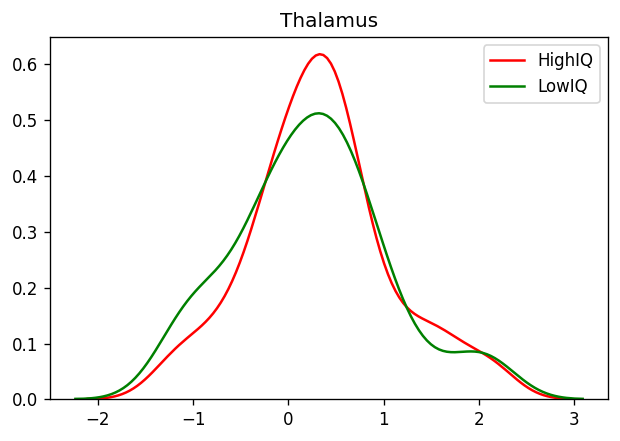

Olfactory_areas
['Dorsal_peduncular_area' 'Anterior_olfactory_nucleus'
 'Accessory_olfactory_bulb' 'Taenia_tecta']
0.2659204157263358 0.28988791599941555 0.9173214923759427
MannwhitneyuResult(statistic=7.0, pvalue=0.44261695723660077)
MannwhitneyuResult(statistic=20190.0, pvalue=0.3043716857780724)


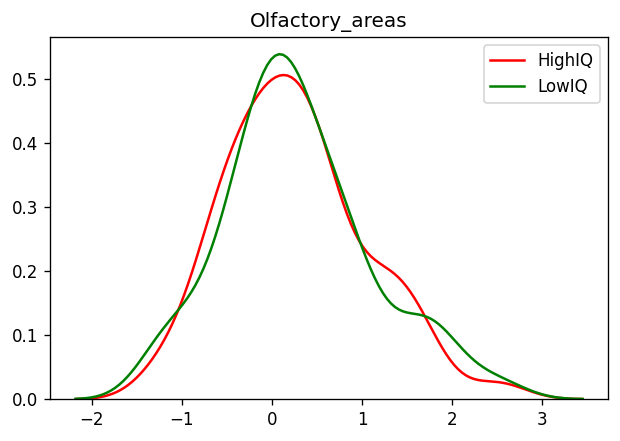

Cortical_subplate
['Claustrum' 'Endopiriform_nucleus_dorsal_part'
 'Basolateral_amygdalar_nucleus']
0.09763141209074157 0.4034079975164734 0.2420165507173782
MannwhitneyuResult(statistic=0.0, pvalue=0.04042779918502612)
MannwhitneyuResult(statistic=9787.0, pvalue=0.006721181977488384)


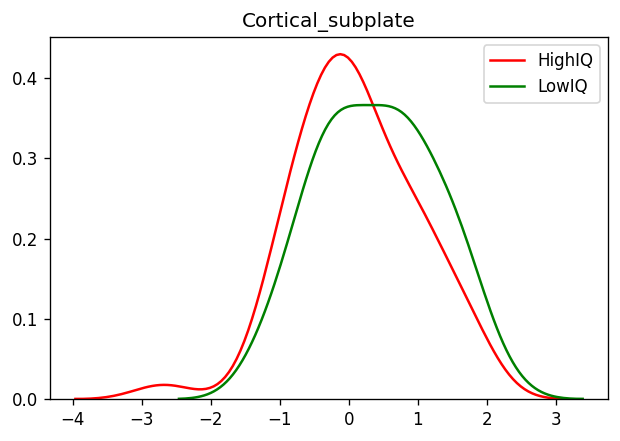

Striatum
['Nucleus_accumbens' 'Lateral_septal_nucleus_rostral_rostroventral_part'
 'Lateral_septal_nucleus_caudal_caudodorsal_part']
0.13498985689350504 0.27158161277988824 0.4970507963030316
MannwhitneyuResult(statistic=0.0, pvalue=0.04042779918502612)
MannwhitneyuResult(statistic=10427.0, pvalue=0.05002047528657057)


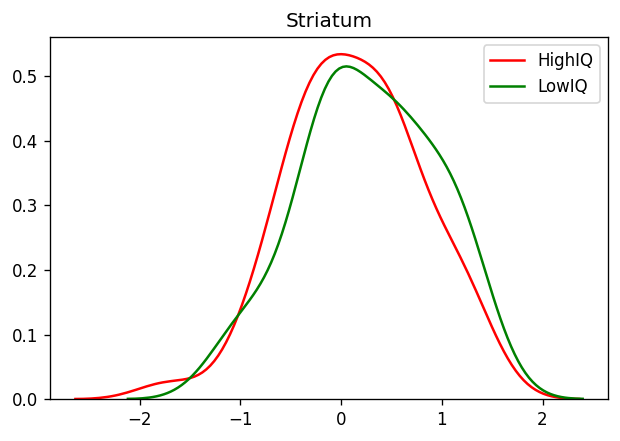

Hippocampal_region
['Dentate_gyrus' 'Field_CA1' 'Field_CA2' 'Field_CA3']
0.3042749919072159 0.41518723224752746 0.7328621120165189
MannwhitneyuResult(statistic=3.0, pvalue=0.09696542614120535)
MannwhitneyuResult(statistic=19353.0, pvalue=0.11222228232781484)


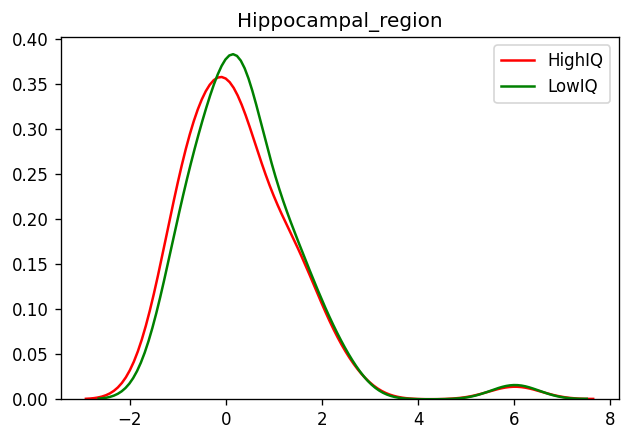

Hippocampal_formation
['Subiculum_ventral_part' 'Subiculum_dorsal_part' 'Parasubiculum'
 'Presubiculum']
0.12621772342286658 0.29171435724351413 0.432675733260204
MannwhitneyuResult(statistic=1.0, pvalue=0.030300984856003035)
MannwhitneyuResult(statistic=18597.0, pvalue=0.03217873213629922)


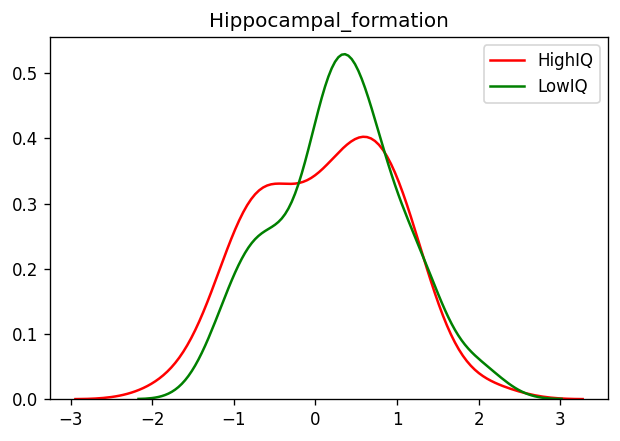

Isocortex
['Prelimbic_area' 'Orbital_area_lateral_part' 'Infralimbic_area'
 'Orbital_area_ventrolateral_part' 'Anterior_cingulate_area_dorsal_part'
 'Primary_visual_area' 'Anteromedial_visual_area'
 'Retrosplenial_area_lateral_agranular_part' 'Orbital_area_medial_part'
 'Secondary_motor_area' 'Anterior_cingulate_area_ventral_part'
 'Agranular_insular_area_ventral_part'
 'Posterior_parietal_association_areas' 'Lateral_visual_area']
0.14262470165985172 0.3112570612972824 0.45822157757773885
MannwhitneyuResult(statistic=21.0, pvalue=0.00021987904338980794)
MannwhitneyuResult(statistic=229707.0, pvalue=0.0006385030863518125)


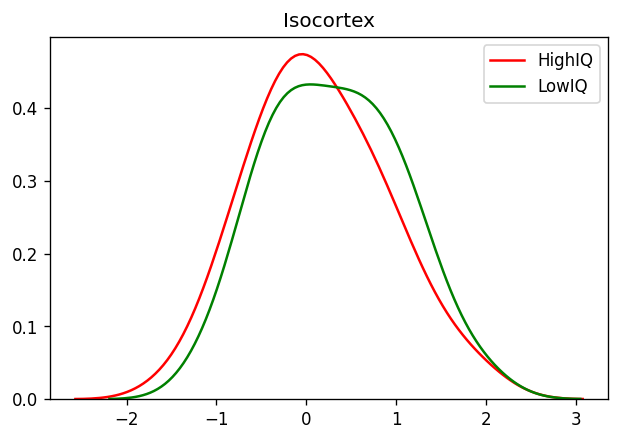

In [111]:
for REG in list(set(Incircuit_df["REG"].values)):
    print(REG)
    STRs = Incircuit_df[Incircuit_df["REG"]==REG]["STR"].values
    print(STRs)
    tmp_dat_asdp = []
    tmp_dat_ndd = []
    for STR in STRs:
        asd_p = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, HighIQ_gene2MutN, Method = 2, 
                                                Match_DF = Agg_Match)
        asd_ndd = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, LowIQ_gene2MutN, Method = 2, 
                                                  Match_DF = Agg_Match)
        tmp_dat_asdp.append(asd_p)
        tmp_dat_ndd.append(asd_ndd)
    tmp_dat_asdp = np.array(tmp_dat_asdp)
    tmp_dat_ndd = np.array(tmp_dat_ndd)
    #print(tmp_dat_asdp.shape, tmp_dat_ndd.shape)
    xx_1 = np.mean(tmp_dat_asdp, axis=0)
    xx_2 = np.mean(tmp_dat_ndd, axis=0)
    #print(len(xx_1), len(xx_2))
    print(np.mean(xx_1), np.mean(xx_2), np.mean(xx_1)/np.mean(xx_2))
    print(mannwhitneyu(np.mean(tmp_dat_asdp, axis=1), np.mean(tmp_dat_ndd, axis=1)))
    #print(wilcoxon(xx_1, xx_2))
    print(mannwhitneyu(tmp_dat_asdp.flatten(), tmp_dat_ndd.flatten()))
    fig = plt.figure(dpi=120)
    colors = ["red", "green", "blue"]
    sns.distplot(a=xx_1, hist=False, label="HighIQ", color=colors[0])
    sns.distplot(a=xx_2, hist=False, label="LowIQ", color=colors[1])
    mannwhitneyu(xx_1, xx_2)
    plt.title(REG)
    plt.show()

In [113]:
for REG in list(set(Incircuit_df["REG"].values)):
    #print(REG)
    STRs = Incircuit_df[Incircuit_df["REG"]==REG]["STR"].values

    for STR in STRs:
        #print(REG, STR)
        asd_p = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, HighIQ_gene2MutN, Method = 2, 
                                                Match_DF = Agg_Match)
        asd_ndd = ZscoreOneSTR_Weighted_Indv_Gene(STR, ExpZscoreMat, LowIQ_gene2MutN, Method = 2, 
                                                  Match_DF = Agg_Match)
        
        bias_1, bias_2 = np.mean(asd_p), np.mean(asd_ndd)
        ratio = bias_1/bias_2
        #if ratio > 2 or ratio < 0.5:
        print(REG, STR)
        print(bias_1, bias_2, ratio)
        print(mannwhitneyu(asd_p, asd_ndd))
        print()
        #print(np.mean(asd_p), np.mean(asd_ndd), np.mean(asd_p)/np.mean(asd_ndd))

Thalamus Lateral_posterior_nucleus_of_the_thalamus
0.41122468992679584 0.395700009301666 1.0392334603492375
MannwhitneyuResult(statistic=1283.0, pvalue=0.45602267193758333)

Thalamus Nucleus_of_reuniens
0.24365459250013216 0.14508203222867255 1.6794263821456088
MannwhitneyuResult(statistic=1242.0, pvalue=0.3501435398601562)

Thalamus Mediodorsal_nucleus_of_thalamus
0.38727009081194275 0.22725318964909863 1.7041348964559133
MannwhitneyuResult(statistic=1193.0, pvalue=0.2379343880659736)

Thalamus Submedial_nucleus_of_the_thalamus
0.3051493390585599 0.2026593320848286 1.5057255736480535
MannwhitneyuResult(statistic=1251.0, pvalue=0.3727106562342851)

Olfactory_areas Dorsal_peduncular_area
0.27137182501154256 0.3506125254048385 0.7739935266094677
MannwhitneyuResult(statistic=1249.0, pvalue=0.3676546298452593)

Olfactory_areas Anterior_olfactory_nucleus
0.33702260746625196 0.3519290001304747 0.9576437501351229
MannwhitneyuResult(statistic=1259.0, pvalue=0.39314679378648143)

Olfactory_area